In [31]:
import os
import json
#import spotipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint
#import spotipy.util as util

Olhar isso aqui: https://stackoverflow.com/questions/2083987/how-to-retry-after-exception

In [32]:
df = pd.read_csv('df.csv')
df = df[df['genero'] != 'hip-hop']
df = df.reset_index(drop=True)
#df['genero'] = df.genero.astype('category')
#df = df.drop(['duration_ms'], axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 11 columns):
genero              4076 non-null object
acousticness        4076 non-null float64
danceability        4076 non-null float64
duration_ms         4076 non-null float64
energy              4076 non-null float64
instrumentalness    4076 non-null float64
liveness            4076 non-null float64
loudness            4076 non-null float64
speechiness         4076 non-null float64
tempo               4076 non-null float64
valence             4076 non-null float64
dtypes: float64(10), object(1)
memory usage: 350.4+ KB


# Exploração dos dados

# Mudar pra 5 de 2, adicionando a duração da música

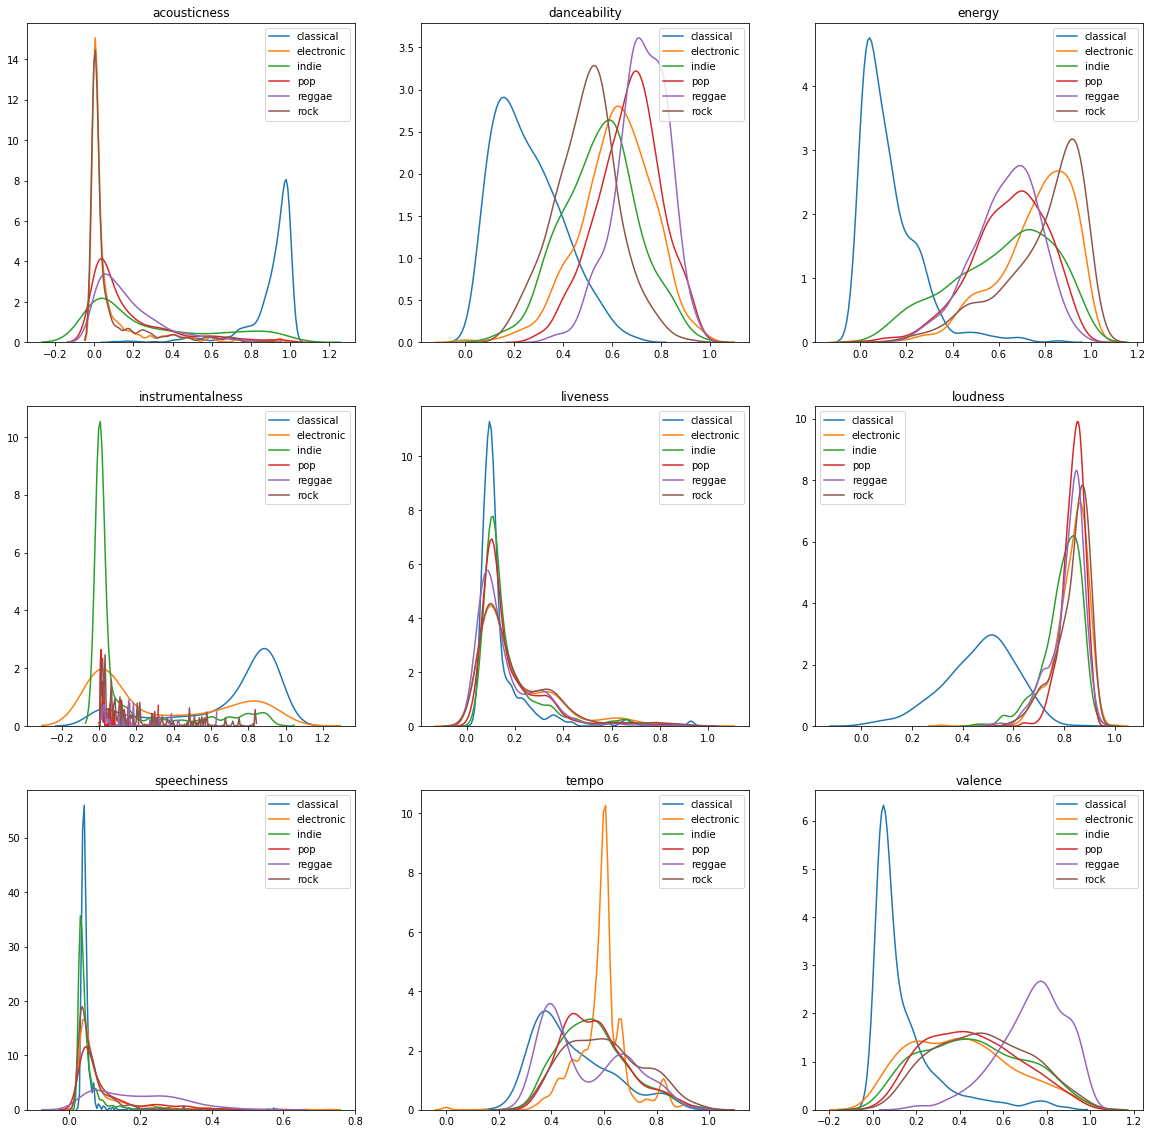

In [33]:
f, axes = plt.subplots(3, 3, figsize=(20, 20))

count1 = 0
count2 = 0

for j, a in zip(df.drop(labels=['genero','duration_ms'], axis=1), range(12)):
    if a != 0:
        if a%3==0:
            count2 += 1
            count1 = 0
    for i in df['genero'].unique():
        sns.kdeplot(df[df['genero'] == i][j], label=i, ax=axes[count2, count1])
        axes[count2, count1].set_title(j)
    count1 += 1

## Correlação

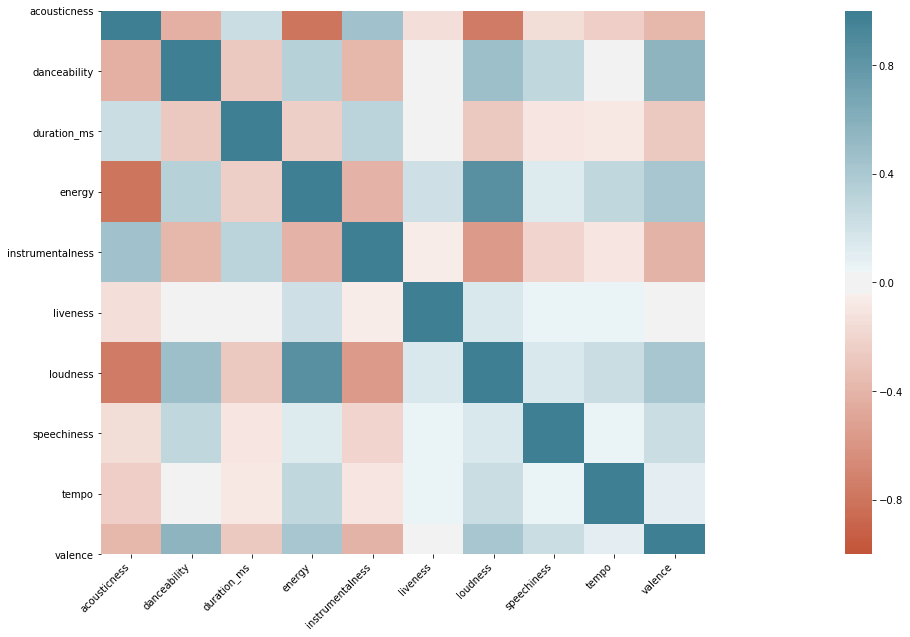

In [34]:
plt.rcParams["figure.figsize"] = (50,10)

ax = sns.heatmap(
    df.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Ficou massa, mas vamos fazer pra cada um dos gêneros musicais

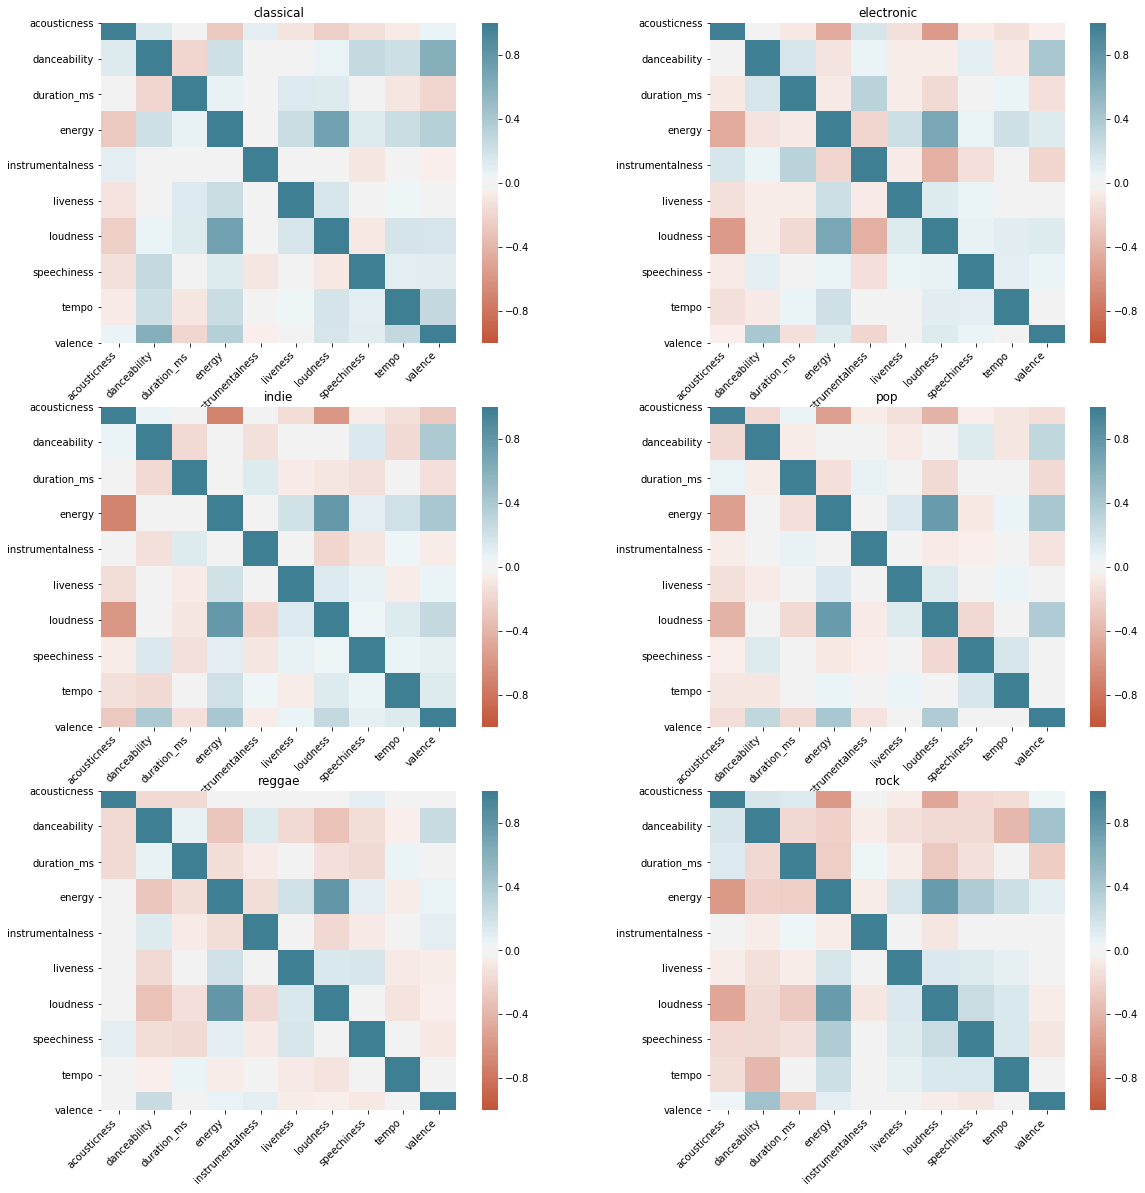

In [35]:
f, axes = plt.subplots(3, 2, figsize=(20, 20))

count1 = 0
count2 = 0

for i, a in zip(df['genero'].unique(), range(6)):
    if a != 0:
        if (a % 2) == 0:
            count2 += 1
            count1 = 0
    ax = sns.heatmap(
            df[df['genero'] == i].corr(), 
            vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200),
            square=True,
            label=i,
            ax=axes[count2, count1]
    )
    ax.set_xticklabels(
            ax.get_xticklabels(),
            rotation=45,
            horizontalalignment='right'
    );
    axes[count2, count1].set_title(i)
    count1 += 1

Energy e Loudness sempre possui uma correlação alta, independente do gênero musical.

# Extração de Atributos

In [48]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
print(X)

[[8.15000000e-01 2.21000000e-01 1.78684481e-01 ... 3.57000000e-02
  4.73067373e-01 3.40000000e-02]
 [9.14000000e-01 1.44000000e-01 1.58528456e-01 ... 3.44000000e-02
  4.19850072e-01 8.40000000e-02]
 [9.55000000e-01 2.94000000e-01 1.73443756e-01 ... 3.86000000e-02
  4.56755031e-01 1.87000000e-01]
 ...
 [1.64000000e-01 7.27000000e-01 7.54967782e-02 ... 5.00000000e-02
  6.22900655e-01 8.22000000e-01]
 [3.19000000e-02 7.31000000e-01 7.79675805e-02 ... 3.23000000e-02
  4.92037742e-01 7.80000000e-01]
 [2.37000000e-04 3.54000000e-01 9.86096255e-02 ... 1.68000000e-01
  6.79982028e-01 1.94000000e-01]]


## PCA

In [49]:
from sklearn.decomposition import PCA

In [55]:
pca = PCA(n_components = 2)
principalComponent_result = pca.fit_transform(X)

principalComponent_result_df = pd.DataFrame(data = principalComponent_result
             , columns = ['principal component 1', 'principal component 2'])

print(principalComponent_result_df)

      principal component 1  principal component 2
0                  1.066240               0.140777
1                  1.179207               0.187113
2                  1.103361               0.168098
3                  1.262738              -0.057898
4                  0.781270              -0.174214
...                     ...                    ...
4071              -0.156485               0.101844
4072              -0.314384              -0.142105
4073              -0.404166              -0.145205
4074              -0.470799              -0.074214
4075              -0.302196               0.276206

[4076 rows x 2 columns]


<Figure size 3600x720 with 0 Axes>

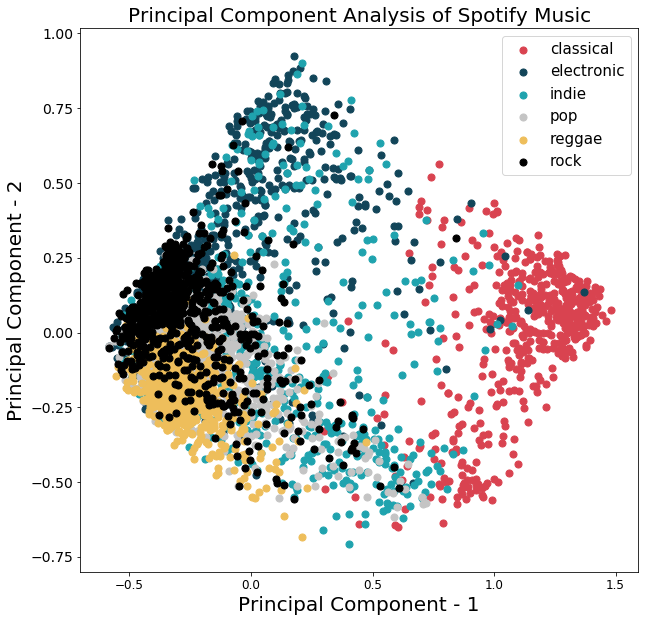

In [51]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Spotify Music",fontsize=20)
targets = ['classical', 'electronic', 'indie', 'pop', 'reggae', 'rock']
colors = ['#D94350', '#124559', '#1FA3AE', '#C4C4C4', '#EEBE5B', '#000000']
for target, color in zip(targets,colors):
    indicesToKeep = df['genero'] == target
    plt.scatter(principalComponent_result_df.loc[indicesToKeep, 'principal component 1']
               , principalComponent_result_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

## t-SNE

In [52]:
from sklearn.manifold import TSNE

In [53]:
tsne = TSNE(n_components = 2)

tsne_result = tsne.fit_transform(X)

tsne_result_df = pd.DataFrame(data = tsne_result, columns = ['tsne 1', 'tsne 2'])


<Figure size 3600x720 with 0 Axes>

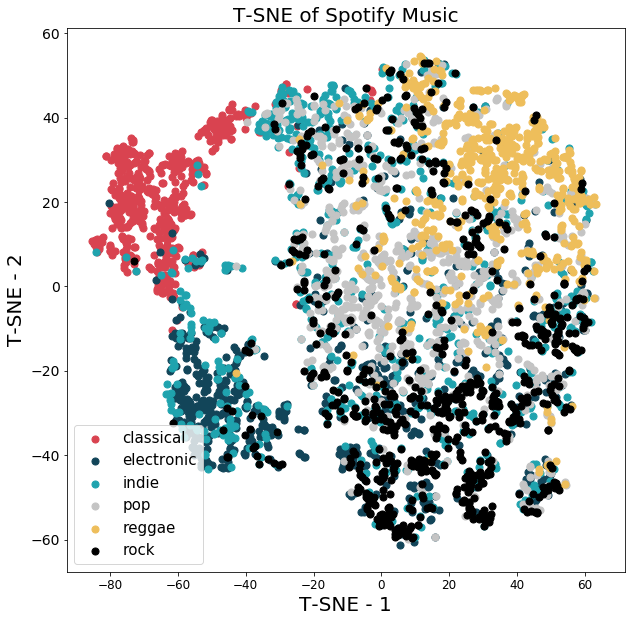

In [54]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('T-SNE - 1',fontsize=20)
plt.ylabel('T-SNE - 2',fontsize=20)
plt.title("T-SNE of Spotify Music",fontsize=20)
targets = ['classical', 'electronic', 'indie', 'pop', 'reggae', 'rock']
colors = ['#D94350', '#124559', '#1FA3AE', '#C4C4C4', '#EEBE5B', '#000000']
for target, color in zip(targets,colors):
    indicesToKeep = df['genero'] == target
    plt.scatter(tsne_result_df.loc[indicesToKeep, 'tsne 1']
               , tsne_result_df.loc[indicesToKeep, 'tsne 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

# Modelos Supervisionados

## Preparando os dados para colocar nos modelos

### Divisão entre conjunto de treinamento e de teste

In [62]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, 1: ].values
y = df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Normalização dos Dados

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

### Pipeline

In [68]:
from sklearn.pipeline import Pipeline

### GridSearch

In [70]:
from sklearn.model_selection import GridSearchCV

### Classification Report

In [66]:
from sklearn.metrics import classification_report

## K-NN

### Um de cada vez

0.5760549558390579


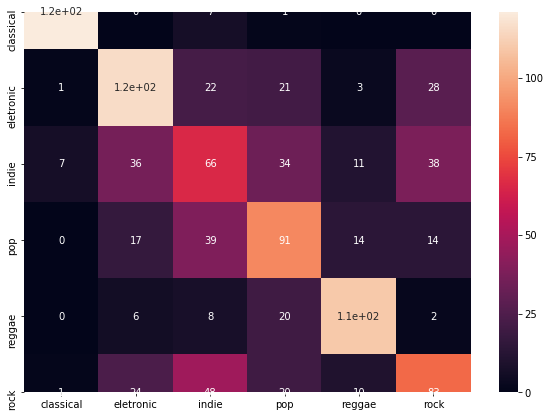

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

print(accuracy_score(y_test, y_pred))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index = ['classical', 'eletronic', 'indie', 'pop', 'reggae', 'rock'],
                  columns = ['classical', 'eletronic', 'indie', 'pop', 'reggae', 'rock'])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)


### Fazendo um Pipeline

In [71]:
from sklearn.neighbors import KNeighborsClassifier

steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)

parameters = {'knn__n_neighbors':[5,10,15,20,25]}

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.5829244357212954
Accuracy without Scaling: 0.5760549558390579


In [72]:
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)

parameters = {'knn__n_neighbors':[5,10,15,20,25],
              'knn__weights':['uniform','distance'],
              'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
              'knn__algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

cv = GridSearchCV(pipeline, param_grid=parameters, cv=5, scoring='accuracy')

# Fit to the training set
cv.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.6261040235525025
              precision    recall  f1-score   support

   classical       0.94      0.92      0.93       129
  electronic       0.65      0.60      0.62       191
       indie       0.49      0.35      0.41       192
         pop       0.53      0.65      0.58       175
      reggae       0.74      0.82      0.78       146
        rock       0.52      0.56      0.54       186

    accuracy                           0.63      1019
   macro avg       0.64      0.65      0.64      1019
weighted avg       0.62      0.63      0.62      1019

Tuned Model Parameters: {'knn__algorithm': 'auto', 'knn__metric': 'manhattan', 'knn__n_neighbors': 20, 'knn__weights': 'uniform'}


## Árvore de Decisão

In [73]:
from sklearn.tree import DecisionTreeClassifier

steps = [('scaler', StandardScaler()),
        ('dtc', DecisionTreeClassifier())]

pipeline = Pipeline(steps)

parameters = {'dtc__criterion':['gini', 'entropy'],
              'dtc__splitter':['best', 'random'],
              'dtc__presort':[True]}

cv = GridSearchCV(pipeline, param_grid=parameters, cv=5, scoring='accuracy')

# Fit to the training set
cv.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.5466143277723258
              precision    recall  f1-score   support

   classical       0.92      0.91      0.91       129
  electronic       0.55      0.53      0.54       191
       indie       0.36      0.35      0.36       192
         pop       0.47      0.47      0.47       175
      reggae       0.67      0.69      0.68       146
        rock       0.45      0.47      0.46       186

    accuracy                           0.55      1019
   macro avg       0.57      0.57      0.57      1019
weighted avg       0.55      0.55      0.55      1019

Tuned Model Parameters: {'dtc__criterion': 'entropy', 'dtc__presort': True, 'dtc__splitter': 'best'}


## Naive Bayes

In [74]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

NB = GaussianNB().fit(X_train, y_train)

scores = cross_val_score(NB, X_train, y_train, cv=10, scoring='accuracy')

scores.mean()

0.575994061335163

## MLP

In [23]:
from sklearn.neural_network import MLPClassifier

steps = [('scaler', StandardScaler()),
        ('mlp', MLPClassifier())]

pipeline = Pipeline(steps)

parameters = {'mlp__hidden_layer_sizes':[4,8,12],
              'mlp__activation':['identity', 'logistic', 'tanh', 'relu'],
              'mlp__solver':['lbfgs', 'sgd', 'adam'],
              'mlp__learning_rate':['constant', 'invscaling', 'adaptive'],
              'mlp__learning_rate_init':[0.1, 0.01, 0.001],
              'mlp__batch_size':[100,500,1000]}

cv = GridSearchCV(pipeline, param_grid=parameters, cv=5, scoring='accuracy')

# Fit to the training set
cv.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt

Accuracy: 0.4474975466143278
              precision    recall  f1-score   support

   classical       0.79      0.92      0.85       129
  electronic       0.54      0.38      0.44       191
       indie       0.36      0.19      0.25       192
         pop       0.30      0.36      0.33       175
      reggae       0.39      0.62      0.48       146
        rock       0.39      0.40      0.39       186

    accuracy                           0.45      1019
   macro avg       0.46      0.48      0.46      1019
weighted avg       0.45      0.45      0.44      1019

Tuned Model Parameters: {'mlp__activation': 'tanh', 'mlp__batch_size': 500, 'mlp__hidden_layer_sizes': 12, 'mlp__learning_rate': 'invscaling', 'mlp__learning_rate_init': 0.001, 'mlp__solver': 'lbfgs'}


# Modelos Não Supervisionados

In [75]:
from sklearn.metrics import davies_bouldin_score

from sklearn import metrics
from sklearn.metrics import pairwise_distances
import numpy as np
import pandas as pd

In [76]:
df = pd.read_csv("df.csv")

X = df.iloc[:, 1:].values

X

array([[8.15000000e-01, 2.21000000e-01, 1.78684481e-01, ...,
        3.57000000e-02, 4.73067373e-01, 3.40000000e-02],
       [9.14000000e-01, 1.44000000e-01, 1.58528456e-01, ...,
        3.44000000e-02, 4.19850072e-01, 8.40000000e-02],
       [9.55000000e-01, 2.94000000e-01, 1.73443756e-01, ...,
        3.86000000e-02, 4.56755031e-01, 1.87000000e-01],
       ...,
       [1.64000000e-01, 7.27000000e-01, 7.54967782e-02, ...,
        5.00000000e-02, 6.22900655e-01, 8.22000000e-01],
       [3.19000000e-02, 7.31000000e-01, 7.79675805e-02, ...,
        3.23000000e-02, 4.92037742e-01, 7.80000000e-01],
       [2.37000000e-04, 3.54000000e-01, 9.86096255e-02, ...,
        1.68000000e-01, 6.79982028e-01, 1.94000000e-01]])

In [ ]:
from sklearn.cluster import KMeans
dataFrame_davies_kmeans = pd.DataFrame(columns=['mean', 'std', 'n_clusters'])
dataFrame_silhouette_kmeans = pd.DataFrame(columns=['mean', 'std', 'n_clusters'])

list_davies_kmeans = []
list_silhouette_kmeans = []
for i in range(19):
    for j in range(5):
        kmeans = KMeans(n_clusters=i+2, random_state=j+1).fit(X)
        labelsK = kmeans.labels_
        
        
        
        list_davies_kmeans.append(davies_bouldin_score(X, labelsK))
        list_silhouette_kmeans.append(metrics.silhouette_score(X, labelsK, metric='euclidean'))
    
    
    dataFrame_davies_kmeans = dataFrame_davies_kmeans.append({'mean': pd.Series(list_davies_kmeans).mean(),
                                  'std':pd.Series(list_davies_kmeans).std(), 'n_clusters': i+2},
                                 ignore_index=True)
    dataFrame_silhouette_kmeans = dataFrame_silhouette_kmeans.append({'mean': pd.Series(list_silhouette_kmeans).mean(),
                                  'std':pd.Series(list_silhouette_kmeans).std(), 'n_clusters': i+2},
                                 ignore_index=True)

In [ ]:
#dataFrame_davies_kmeans.set_index('n_clusters', inplace=True)
dataFrame_davies_kmeans['superior_limit'] = dataFrame_davies_kmeans['mean'] + dataFrame_davies_kmeans['std']
dataFrame_davies_kmeans['inferior_limit'] = dataFrame_davies_kmeans['mean'] - dataFrame_davies_kmeans['std']

In [ ]:
dataFrame_davies_kmeans.plot(x="n_clusters", y=["mean", "superior_limit", "inferior_limit"])

In [ ]:
dataFrame_silhouette_kmeans['superior_limit'] = dataFrame_silhouette_kmeans['mean'] + dataFrame_silhouette_kmeans['std']
dataFrame_silhouette_kmeans['inferior_limit'] = dataFrame_silhouette_kmeans['mean'] - dataFrame_silhouette_kmeans['std']

In [ ]:
dataFrame_silhouette_kmeans.plot(x="n_clusters", y=["mean", "superior_limit", "inferior_limit"])

In [39]:
from sklearn.cluster import AgglomerativeClustering
dataFrame_davies_HC = pd.DataFrame(columns=['mean', 'std', 'n_clusters'])
dataFrame_silhouette_HC = pd.DataFrame(columns=['mean', 'std', 'n_clusters'])


list_davies_HC = []
list_silhouette_HC = []
for i in range(19):
    HC = AgglomerativeClustering(n_clusters=i+2, linkage='single').fit(X)
    labelsHC = HC.labels_
        
        
    list_davies_HC.append(davies_bouldin_score(X, labelsHC))
    list_silhouette_HC.append(metrics.silhouette_score(X, labelsHC, metric='euclidean'))
        
        
    dataFrame_davies_HC = dataFrame_davies_HC.append({'mean': pd.Series(list_davies_HC).mean(),
                                  'std':pd.Series(list_davies_HC).std(), 'n_clusters': i+2},
                                 ignore_index=True)
    dataFrame_silhouette_HC = dataFrame_silhouette_HC.append({'mean': pd.Series(list_silhouette_HC).mean(),
                                  'std':pd.Series(list_silhouette_HC).std(), 'n_clusters': i+2},
                                 ignore_index=True)

In [40]:
dataFrame_davies_HC['superior_limit'] = dataFrame_davies_HC['mean'] + dataFrame_davies_HC['std']
dataFrame_davies_HC['inferior_limit'] = dataFrame_davies_HC['mean'] - dataFrame_davies_HC['std']

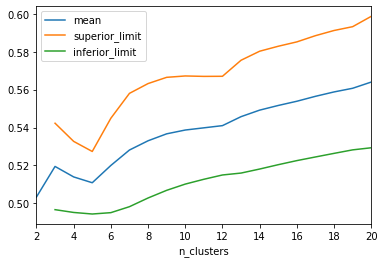

In [42]:
dataFrame_davies_HC.plot(x="n_clusters", y=["mean", "superior_limit", "inferior_limit"])

In [43]:
dataFrame_silhouette_HC['superior_limit'] = dataFrame_silhouette_HC['mean'] + dataFrame_silhouette_HC['std']
dataFrame_silhouette_HC['inferior_limit'] = dataFrame_silhouette_HC['mean'] - dataFrame_silhouette_HC['std']

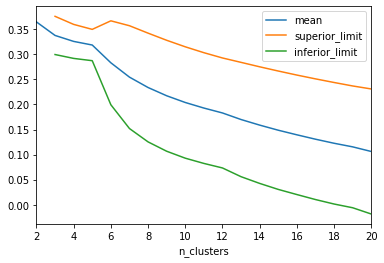

In [44]:
dataFrame_silhouette_HC.plot(x="n_clusters", y=["mean", "superior_limit", "inferior_limit"])

In [45]:
from sklearn.mixture import GaussianMixture
dataFrame_davies_GM = pd.DataFrame(columns=['mean', 'std', 'n_clusters'])
dataFrame_silhouette_GM = pd.DataFrame(columns=['mean', 'std', 'n_clusters'])

list_davies_GM = []
list_silhouette_GM = []
for i in range(19):
    for j in range(5):
        GM = GaussianMixture(n_components=i+2, random_state=j+1).fit_predict(X)
        
        
        list_davies_GM.append(davies_bouldin_score(X, GM))
        list_silhouette_GM.append(metrics.silhouette_score(X, GM, metric='euclidean'))
        
    dataFrame_davies_GM = dataFrame_davies_GM.append({'mean': pd.Series(list_davies_GM).mean(),
                                  'std':pd.Series(list_davies_GM).std(), 'n_clusters': i+2},
                                 ignore_index=True)
    dataFrame_silhouette_GM = dataFrame_silhouette_GM.append({'mean': pd.Series(list_silhouette_GM).mean(),
                                  'std':pd.Series(list_silhouette_GM).std(), 'n_clusters': i+2},
                                 ignore_index=True)

In [48]:
dataFrame_davies_GM['superior_limit'] = dataFrame_davies_GM['mean'] + dataFrame_davies_GM['std']
dataFrame_davies_GM['inferior_limit'] = dataFrame_davies_GM['mean'] - dataFrame_davies_GM['std']

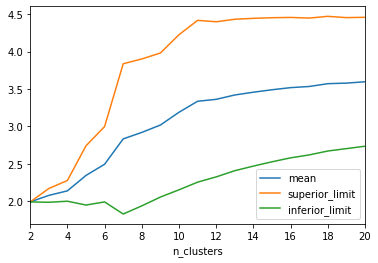

In [50]:
dataFrame_davies_GM.plot(x="n_clusters", y=["mean", "superior_limit", "inferior_limit"])

In [51]:
dataFrame_silhouette_GM['superior_limit'] = dataFrame_silhouette_GM['mean'] + dataFrame_silhouette_GM['std']
dataFrame_silhouette_GM['inferior_limit'] = dataFrame_silhouette_GM['mean'] - dataFrame_silhouette_GM['std']

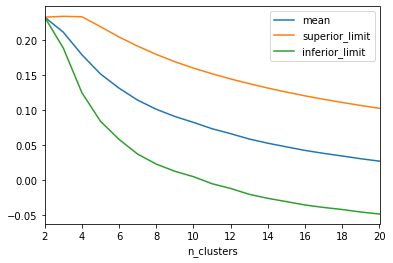

In [52]:
dataFrame_silhouette_GM.plot(x="n_clusters", y=["mean", "superior_limit", "inferior_limit"])

# Comitês

## Bagging

### K-NN

In [12]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), n_estimators=10, max_samples=0.5, max_features=0.5)
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.38469087340529934


In [27]:
steps = [('scaler', StandardScaler()),
        ('bag', BaggingClassifier(KNeighborsClassifier(algorithm='auto', metric='manhattan', n_neighbors=25, weights='uniform')))]

pipeline = Pipeline(steps)

parameters = {'bag__n_estimators':[10,15,20]}


cv = GridSearchCV(pipeline, param_grid=parameters, cv=5, scoring='accuracy')

cv.fit(X_train, y_train)

y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.44062806673209026
              precision    recall  f1-score   support

   classical       0.75      0.91      0.82       129
  electronic       0.48      0.49      0.49       191
       indie       0.33      0.19      0.24       192
         pop       0.31      0.33      0.32       175
      reggae       0.41      0.49      0.45       146
        rock       0.36      0.39      0.38       186

    accuracy                           0.44      1019
   macro avg       0.44      0.47      0.45      1019
weighted avg       0.43      0.44      0.43      1019

Tuned Model Parameters: {'bag__n_estimators': 15}


### Árvore de Decisão

In [22]:
steps = [('scaler', StandardScaler()),
        ('bag', BaggingClassifier(DecisionTreeClassifier(criterion='entropy', presort=True, splitter='best')))]

pipeline = Pipeline(steps)

parameters = {'bag__n_estimators':[10,15,20]}

cv = GridSearchCV(pipeline, param_grid=parameters, cv=5, scoring='accuracy')

cv.fit(X_train, y_train)

y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.4013738959764475
              precision    recall  f1-score   support

   classical       0.81      0.85      0.83       129
  electronic       0.43      0.43      0.43       191
       indie       0.26      0.26      0.26       192
         pop       0.26      0.29      0.28       175
      reggae       0.39      0.42      0.40       146
        rock       0.37      0.30      0.33       186

   micro avg       0.40      0.40      0.40      1019
   macro avg       0.42      0.42      0.42      1019
weighted avg       0.40      0.40      0.40      1019

Tuned Model Parameters: {'bag__n_estimators': 20}


### Naive Bayes

In [21]:
steps = [('scaler', StandardScaler()),
        ('bag', BaggingClassifier(GaussianNB()))]

pipeline = Pipeline(steps)

parameters = {'bag__n_estimators':[10,15,20]}

cv = GridSearchCV(pipeline, param_grid=parameters, cv=5, scoring='accuracy')

cv.fit(X_train, y_train)

y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.41216879293424924
              precision    recall  f1-score   support

   classical       0.74      0.97      0.84       129
  electronic       0.37      0.67      0.47       191
       indie       0.33      0.15      0.21       192
         pop       0.25      0.11      0.15       175
      reggae       0.51      0.32      0.39       146
        rock       0.29      0.39      0.33       186

   micro avg       0.41      0.41      0.41      1019
   macro avg       0.42      0.43      0.40      1019
weighted avg       0.39      0.41      0.38      1019

Tuned Model Parameters: {'bag__n_estimators': 15}


### MLP

In [24]:
from sklearn.neural_network import MLPClassifier

steps = [('scaler', StandardScaler()),
        ('bag', BaggingClassifier(MLPClassifier(activation='logistic', batch_size=500, hidden_layer_sizes=8, learning_rate='adaptive', learning_rate_init=0.1, solver='lbfgs')))]

pipeline = Pipeline(steps)

parameters = {'bag__n_estimators':[10,15,20]}

cv = GridSearchCV(pipeline, param_grid=parameters, cv=5, scoring='accuracy')

cv.fit(X_train, y_train)

y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))



Accuracy: 0.44062806673209026
              precision    recall  f1-score   support

   classical       0.80      0.93      0.86       129
  electronic       0.47      0.37      0.41       191
       indie       0.38      0.16      0.23       192
         pop       0.29      0.40      0.34       175
      reggae       0.41      0.64      0.50       146
        rock       0.38      0.35      0.36       186

   micro avg       0.44      0.44      0.44      1019
   macro avg       0.46      0.47      0.45      1019
weighted avg       0.44      0.44      0.42      1019

Tuned Model Parameters: {'bag__n_estimators': 15}


## Stacking

### K-NN

### Árvore Decisão

http://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/

### Naive Bayes

### MLP